In [1]:
import tags
import pid
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vcap = cv2.VideoCapture("AprilTagTest.mkv")

In [3]:
PIDVertical = pid.PID(0.09,0,0,100)
PIDHorizontal = pid.PID(0.05,0,0,100)
id_to_track = 0

In [4]:
frequency = 100

960.0 540.0
Vertical Thrusters: 20.098469119153826, Horizontal Thrusters: 6.828398904176902


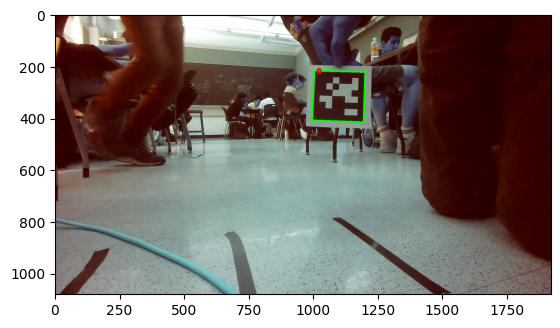

960.0 540.0
Vertical Thrusters: 10.4722120365316, Horizontal Thrusters: 8.231413020765705


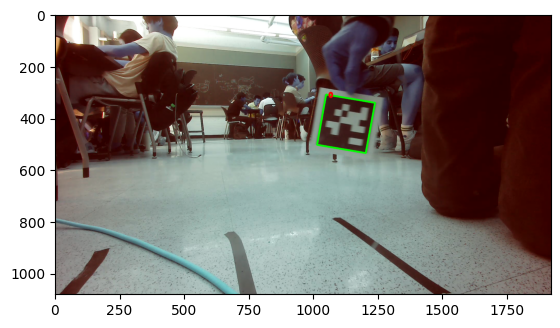

960.0 540.0
Vertical Thrusters: 26.61339930999774, Horizontal Thrusters: -5.955342375215077


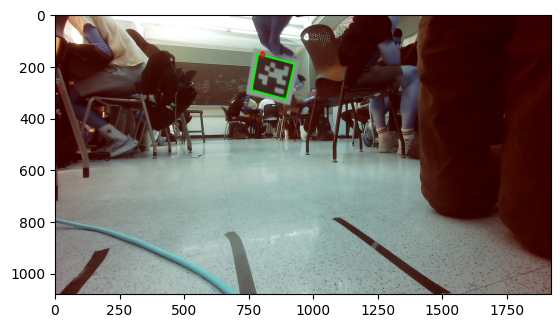

960.0 540.0
Vertical Thrusters: 0, Horizontal Thrusters: 0


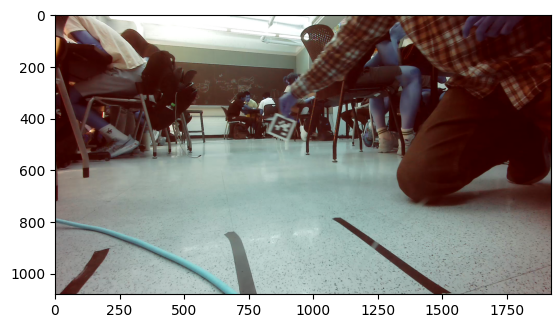

960.0 540.0
Vertical Thrusters: 0, Horizontal Thrusters: 0


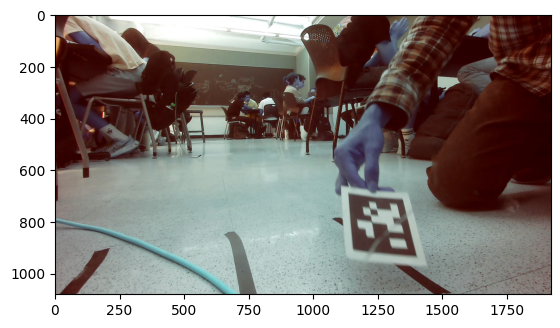

960.0 540.0
Vertical Thrusters: -31.322939946499293, Horizontal Thrusters: 13.27424965141222


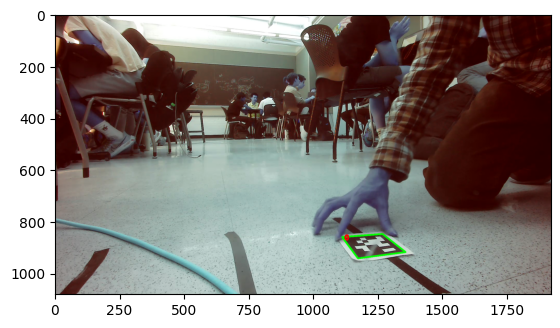

960.0 540.0
Vertical Thrusters: 0, Horizontal Thrusters: 0


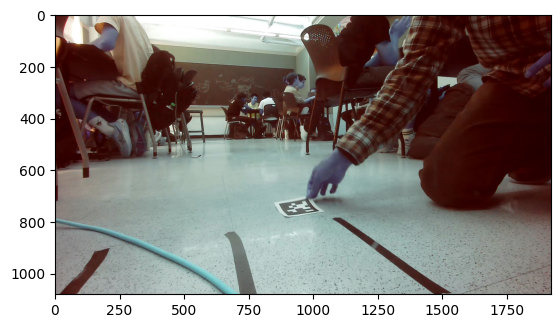

960.0 540.0
Vertical Thrusters: 1.369754982845526, Horizontal Thrusters: -18.488402557040214


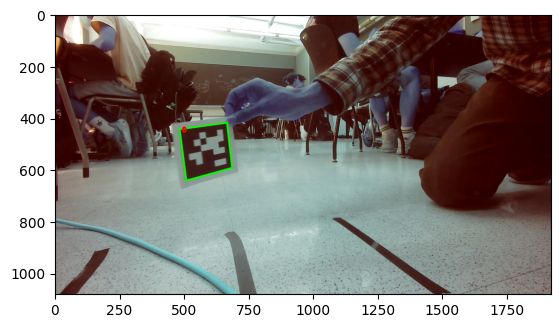

960.0 540.0
Vertical Thrusters: 15.221179583564247, Horizontal Thrusters: 10.708753468636452


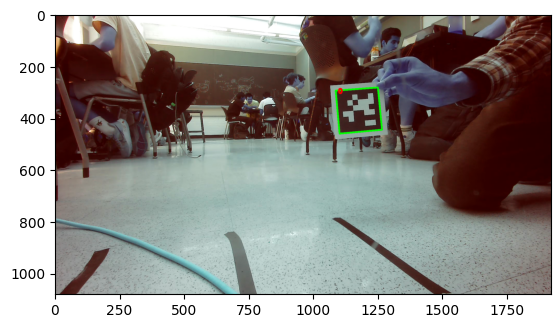

In [5]:
maxRetry = 1000
count = 0

while count < maxRetry:
    ret, img = vcap.read()

    if not ret:
        break

    if count % frequency == 0:
        temp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        apriltags = tags.get_tags(temp)
        tag_img = tags.draw_tags(apriltags, img)

        centers = tags.get_positions(apriltags)
        relative_centers = tags.error_relative_to_center(centers, img.shape[0], img.shape[1])
        
        powY = 0
        powX = 0
        for center in relative_centers:
            if center[2] == 0:
                powY= PIDHorizontal.update(center[0])
                powX = PIDVertical.update(center[1])
        
        print(f"Vertical Thrusters: {powX}, Horizontal Thrusters: {powY}")

        plt.imshow(tag_img)
        plt.show()

    count += 1